# 1. 通し課題
kaggleのデータセットを用いてモデルを構築し結果を公開することを本講座の通し課題とします。

* 公開先は、 kaggleのKernelsまたはGithubとします
* Slackの所属チャンネルにipynbファイルを直接貼っても良いこととします
* 課題は、以下の2つから選んで下さい
    * 課題① Kickstarter Projects クラウドファンデイングが 成功するか(state)を予測
    * 課題② Car Fuel Consumption 100kmあたりのガソリン消費量(consume)を予測

# 2. 選択課題
以下の課題①を選択する。
* Kickstarter Projects (https://www.kaggle.com/kemical/kickstarter-projects)


# 3. 予測方針
Scikit-learnを用いて、ロジスティック回帰にて実装

# 4. プログラム

## 4-1. データ読み込み&前処理
### 4-1-1. データ、項目の理解
* データの理解
以下の2つのデータがあるが、ks-projects-201612は、古いデータと理解。よって、ks-projects-201801のデータを利用して、予測モデルを構築する。
  * ks-projects-201612
  * ks-projects-201801

* 項目の確認と理解
  * ID：　連番
  * name：　プロジェクト名
  * category：　詳細なカテゴリー
  * main_category：　大きなカテゴリー
  * currency：　pledgedの通貨
  * deadline：　クラウドファンディングの募集締め切り日
  * goal：　クラウドファンディングの目標金額（各国の通貨）
  * launched：　クラウドファンディングの募集開始日
  * pledged：　クラウドファンディングの集まった金額
  * state：　成否
  * backers：　クラウドファンディングした人の数
  * country：　クラウドファンディング主催者の国
  * usd pledged：　クラウドファンディングの集まった金額（KSによってUSDに変換されたもの）
  * usd_pledged_real：　クラウドファンディングの集まった金額（fixer.io apiによってUSDに変換されたもの）
  * usd_goal_real：　クラウドファンディングの目標金額（fixer.io apiによってUSDに変換されたもの）

### 4-1-2. データ分析

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数

In [3]:
df_company_work = pd.read_csv("ks-projects-201801.csv")
print('*****サンプルデータ*****')
print(df_company_work.head())
print()
print('*****データ統計*****')
print(df_company_work.describe())
print()
print('the number of rows and cloumns：',df_company_work.shape)
print()
print('column：',df_company_work.columns)
print()
print('type of column：',df_company_work.dtypes)
print()
print('*****項目の種類*****')
print('Contents of ID ')
print(df_company_work['ID'].unique())
print(df_company_work['ID'].value_counts())
print()
print('contents of name ')
print(df_company_work['name'].unique())
print(df_company_work['name'].value_counts())
print()
print('contents of category ')
print(df_company_work['category'].unique())
print(df_company_work['category'].value_counts())
print()
print('contents of main_category ')
print(df_company_work['main_category'].unique())
print(df_company_work['main_category'].value_counts())
print()
print('contents of currency ')
print(df_company_work['currency'].unique())
print(df_company_work['currency'].value_counts())
print()
print('contents of deadline ')
print(df_company_work['deadline'].unique())
print(df_company_work['deadline'].value_counts())
print()
print('contents of goal ')
print(df_company_work['goal'].unique())
print(df_company_work['goal'].value_counts())
print()
print('contents of launched ')
print(df_company_work['launched'].unique())
print(df_company_work['launched'].value_counts())
print()
print('contents of pledged ')
print(df_company_work['pledged'].unique())
print(df_company_work['pledged'].value_counts())
print()
print('contents of state ')
print(df_company_work['state'].unique())
print(df_company_work['state'].value_counts())
print()
print('contents of backers ')
print(df_company_work['backers'].unique())
print(df_company_work['backers'].value_counts())
print()
print('contents of country ')
print(df_company_work['country'].unique())
print(df_company_work['country'].value_counts())
print()
print('contents of usd pledged ')
print(df_company_work['usd pledged'].unique())
print(df_company_work['usd pledged'].value_counts())
print()
print('contents of usd_pledged_real ')
print(df_company_work['usd_pledged_real'].unique())
print(df_company_work['usd_pledged_real'].value_counts())
print()
print('contents of usd_goal_real ')
print(df_company_work['usd_goal_real'].unique())
print(df_company_work['usd_goal_real'].value_counts())
print()

print('*****NULLチェック*****')
print('check null',df_company_work.isnull().sum())


*****サンプルデータ*****
           ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0 

2014-08-08    705
2014-08-10    558
2014-08-07    541
2015-05-01    489
2014-08-09    477
2015-07-01    449
2015-04-01    430
2014-08-15    423
2014-08-31    420
2014-08-14    413
2014-08-20    394
2014-08-13    394
2015-04-30    391
2014-11-01    379
2015-01-01    378
2015-10-01    375
2014-08-16    361
2015-05-31    359
2017-12-01    356
2015-03-01    355
2015-08-01    349
2014-09-07    344
2014-09-12    344
2014-10-31    343
2015-06-01    343
2015-04-03    338
2014-08-11    337
2014-08-17    336
2015-07-31    334
2016-04-01    334
             ... 
2009-05-22      1
2009-06-09      1
2009-06-04      1
2009-05-03      1
2009-12-28      1
2009-06-14      1
2009-08-03      1
2010-02-19      1
2009-07-09      1
2009-05-26      1
2009-07-26      1
2009-05-20      1
2009-09-23      1
2009-09-28      1
2009-07-30      1
2009-06-17      1
2009-08-06      1
2009-07-11      1
2009-09-08      1
2009-07-03      1
2009-08-28      1
2009-10-27      1
2009-09-07      1
2009-07-20      1
2009-10-23

5000.00      24173
10000.00     20786
1000.00      13029
3000.00      12699
2000.00      11915
15000.00     11374
20000.00     10121
2500.00       9849
500.00        8588
25000.00      8364
1500.00       8171
50000.00      7230
4000.00       6688
6000.00       5983
30000.00      5908
3500.00       5695
8000.00       5215
7000.00       4115
7500.00       4076
12000.00      4074
100000.00     3480
35000.00      2709
1200.00       2493
40000.00      2476
5500.00       2382
4500.00       2328
300.00        2210
600.00        2059
800.00        1919
6500.00       1877
             ...  
51918.94         1
1756.41          1
5568.56          1
2372.80          1
792.52           1
19990.77         1
22279.99         1
15000.15         1
3085.00          1
45211.36         1
30017.45         1
12684.31         1
10040.99         1
3170.58          1
330509.31        1
22835.57         1
3244.59          1
2770.31          1
19980.27         1
10327.08         1
33691.64         1
878.83      

**(確認ポイント)**
* もっと簡単な方法はあるのか？
* やっぱりグラフなどで見たほうがいいか？
* 外れ値も見たほうがいい。

### 4-2-3. 予測モデル 
#### 4-2-3-1 予測モデルの考え方
* 目的変数
  * 目的変数として、結果系の項目である以下の候補が考えられる。今回は、まず成否の判定を行うこととするため、Stateとする。
    * state
    * backers
    * pledged
    * usd_pledged
    * usd_pledged_real
* 説明変数
  * 説明変数については、以下の理由により、項目の削除、統合を行う。
    * 成否の予測に必要のない項目の削除
    　 * ID
  　   * Name
    * 成否の予測時に知りえない項目の削除。
       * pledged：　募集金額は、予測時(事前)には知りえない情報のため、説明変数から削除
       * usd pledged：　募集金額は、予測時(事前)には知りえない情報のため、説明変数から削除
       * usd_pledged_real：　募集金額は、予測時(事前)には知りえない情報のため、説明変数から削除
       * backers：　クラウドファンディングした人の数は、予測時(事前)には知りえない情報のため、説明変数から削除
    * 他の項目と意味が同じ,似ている項目を削除
       * goal：　usd_goal_realと単位が異なるだけの項目のため、削除。
       * currency：　countryとほぼ同じ意味合い。また、USDに換算するためだけの項目のため、削除。
       * category：　main_categoryと似ているため削除。また、値の種類が非常に多いので、計算量が増える？ため削除。
    * 統合できる項目
       * launchとdeadlineは、期間として、数値化して表現し、別項目として、管理するため、削除。また、数値化されるため、モデルにも使いやすい。
    * 数値項目でないものを、one-hotベクトル化
       * main_category
       * state
       * country
    * 0～1に収まっていない項目を標準化
       * usd_goal_real
       * day_diff
   
#### 4-2-3-1 予測モデルのまとめ
* 目的変数
  * stateをone-hotベクトル化したもの
* 説明変数
  * usd_goal_real
  * main_categoryをone-hotベクトル化したもの
  * countryをone-hotベクトル化したもの
  * deadline - launch

**(確認ポイント)**
* 値の種類が多すぎる項目は、計算量も多くなり、入れない方がいいと判断したが、本当か？

In [4]:
#必要のない項目の削除
df_company_work = df_company_work.drop(['ID','name','category','currency','goal','pledged','backers','usd pledged','usd_pledged_real'], axis=1)

#one-hotベクトル化
df_company_work = pd.get_dummies(df_company_work, columns = ['main_category', 'state', 'country'])
df_company_work = df_company_work.drop(['state_canceled','state_failed','state_live','state_suspended','state_undefined'], axis=1)

#launch deadline 数値化、日数に変換
df_company_work.deadline = pd.to_datetime(df_company_work.deadline, format='%Y-%m-%d')
df_company_work.launched = pd.to_datetime(df_company_work.launched, format='%Y-%m-%d')
df_company_work['day_diff'] = (df_company_work.deadline - df_company_work.launched)
df_company_work.day_diff = df_company_work.day_diff / np.timedelta64(1, 'D')

df_company = df_company_work.drop(['deadline', 'launched'], axis=1)

#前処理後データ確認
print('******前処理後データ確認*****')
print(df_company.head())
print(df_company.describe())
print('the number of rows and cloumns：',df_company.shape)
print('column：',df_company.columns)
print('type of column：',df_company.dtypes)



******前処理後データ確認*****
   usd_goal_real  main_category_Art  main_category_Comics  \
0        1533.95                  0                     0   
1       30000.00                  0                     0   
2       45000.00                  0                     0   
3        5000.00                  0                     0   
4       19500.00                  0                     0   

   main_category_Crafts  main_category_Dance  main_category_Design  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   main_category_Fashion  main_category_Film & Video  main_category_Food  \
0                      0                           0                   0   
1                      0               

In [4]:
#標準化
ss = preprocessing.StandardScaler()
mm = preprocessing.MinMaxScaler()

df_company.usd_goal_real = preprocessing.minmax_scale(df_company.usd_goal_real)
df_company.day_diff = preprocessing.minmax_scale(df_company.day_diff)


#前処理後データ確認
print('******前処理後データ確認*****')
print(df_company.head())
print(df_company.describe())
print('the number of rows and cloumns：',df_company.shape)
print('column：',df_company.columns)
print('type of column：',df_company.dtypes)


******前処理後データ確認*****
   usd_goal_real  main_category_Art  main_category_Comics  \
0       0.000009                  0                     0   
1       0.000180                  0                     0   
2       0.000270                  0                     0   
3       0.000030                  0                     0   
4       0.000117                  0                     0   

   main_category_Crafts  main_category_Dance  main_category_Design  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   main_category_Fashion  main_category_Film & Video  main_category_Food  \
0                      0                           0                   0   
1                      0               

**(確認ポイント)**
* 今回のケースではないが、ある項目に文字列と数値が混在している。文字列が含まれた行だけ削除する方法は？
* 標準化はうまくいかず、標準化で0-1に収める方法は？ライブラリーの使い方の問題か？

## 4-3. データ統計量の確認


In [ ]:
#散布図行列
pd.plotting.scatter_matrix(df_company, figsize=(10,10))
plt.show()

実行したが、結果が帰ってこず、一旦、あきらめる。

In [5]:
#相関係数
df_company.corr()

,usd_goal_real,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,...,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US,day_diff
usd_goal_real,1.000000,-0.001538,-0.003850,-0.004688,-0.003119,-0.000913,-0.005061,0.014483,0.000820,-0.000147,...,-0.000130,-0.001809,-0.003523,0.004853,0.000825,-0.001068,-0.000264,-0.000996,-0.002271,0.004175
main_category_Art,-0.001538,1.000000,-0.048604,-0.043738,-0.028413,-0.083238,-0.071763,-0.127316,-0.074707,-0.090773,...,-0.000480,0.004412,-0.028523,-0.002581,-0.004343,-0.002706,-0.002760,-0.002964,0.013322,-0.005819
main_category_Comics,-0.003850,-0.048604,1.000000,-0.026467,-0.017194,-0.050370,-0.043426,-0.077043,-0.045207,-0.054930,...,-0.000956,-0.003517,-0.017260,-0.011874,-0.001185,-0.006511,-0.005878,-0.003670,0.020774,-0.000794
main_category_Crafts,-0.004688,-0.043738,-0.026467,1.000000,-0.015472,-0.045327,-0.039079,-0.069330,-0.040681,-0.049430,...,-0.001975,0.005742,-0.015532,-0.001358,0.000215,0.002651,-0.000999,0.007826,-0.006671,-0.006803
main_category_Dance,-0.003119,-0.028413,-0.017194,-0.015472,1.000000,-0.029445,-0.025386,-0.045037,-0.026427,-0.032110,...,-0.001283,0.002574,-0.009823,-0.003848,-0.000028,-0.002759,-0.004104,-0.003145,0.020072,-0.002090
main_category_Design,-0.000913,-0.083238,-0.050370,-0.045327,-0.029445,1.000000,-0.074370,-0.131941,-0.077421,-0.094070,...,0.000822,-0.004480,-0.029265,0.013322,0.001306,0.006663,0.004667,0.024491,-0.036081,0.002158
main_category_Fashion,-0.005061,-0.071763,-0.043426,-0.039079,-0.025386,-0.074370,1.000000,-0.113752,-0.066748,-0.081102,...,0.000229,-0.004835,-0.025039,0.012953,-0.000426,0.002484,0.003614,0.020469,-0.027759,-0.006272
main_category_Film & Video,0.014483,-0.127316,-0.077043,-0.069330,-0.045037,-0.131941,-0.113752,1.000000,-0.118418,-0.143884,...,-0.004092,0.002374,0.017756,-0.021888,-0.007178,-0.006181,-0.009672,-0.014256,0.046938,0.008735
main_category_Food,0.000820,-0.074707,-0.045207,-0.040681,-0.026427,-0.077421,-0.066748,-0.118418,1.000000,-0.084429,...,0.000814,-0.001868,-0.026207,-0.000536,0.000496,0.001040,-0.001759,-0.003657,0.023748,-0.001643
main_category_Games,-0.000147,-0.090773,-0.054930,-0.049430,-0.032110,-0.094070,-0.081102,-0.143884,-0.084429,1.000000,...,-0.001257,-0.002010,-0.031779,0.015221,0.004025,0.007127,0.014919,0.001750,-0.056199,-0.009409


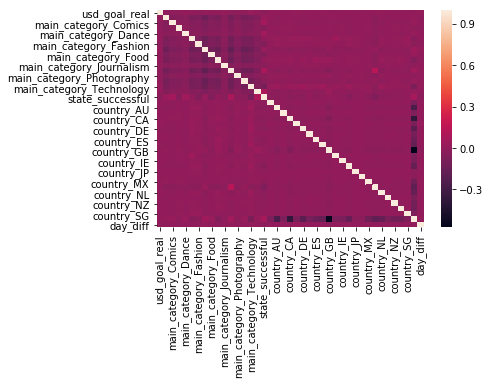

In [6]:
#相関係数をヒートマップ化して可視化
sns.heatmap(df_company.corr())
plt.show()

**(確認ポイント)**
* どの項目も相関が低いが、あまりにも相関が低いものは、説明変数から外した方がいいのか？

## 4-4. 訓練データ、テストデータ作成

In [10]:
#訓練・テストデータ作成
df_company_train, df_company_test = train_test_split(df_company, test_size=0.3)

## 4-5. 訓練

In [11]:
#係数を求める
y = df_company_train["state_successful"].values
X = df_company_train.drop(['state_successful'], axis=1).values

clf = SGDClassifier(loss = 'log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=10000, n_iter=None,
       n_jobs=1, penalty='none', power_t=0.5, random_state=1234,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [12]:
y_pred = clf.predict(X)

# 訓練データの対数尤度を表示
print('訓練データの対数尤度 = {:.3f}'.format(- log_loss(y, y_pred)))

# 訓練データの正答率を計算
accuracy =  accuracy_score(y, y_pred)
print('訓練データの正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

# 訓練データのPrecision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_pred)

# 訓練データのカテゴリ「2000万以上」に関するPrecision, Recall, F1-scoreを表示
print('訓練データの適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('訓練データの再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('訓練データのF1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

訓練データの対数尤度 = -14.304
訓練データの正答率（Accuracy） = 58.586%
訓練データの適合率（Precision） = 76.475%
訓練データの再現率（Recall） = 51.987%
訓練データのF1値（F1-score） = 61.897%


In [14]:
# 訓練データの予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y, y_pred), 
                        index=['実際 = successful', '実際 = failed'], 
                        columns=['予測 = successful', '予測 = failed'])
conf_mat

,予測 = successful,予測 = failed
実際 = successful,89160,82346
実際 = failed,27427,66129


## 4-6. テスト

In [15]:
# テストデータのラベルを予測
y_test = df_company_test["state_successful"].values
X_test = df_company_test.drop(['state_successful'], axis=1).values

y_est = clf.predict(X_test)

# テストデータの対数尤度を表示
print('テストデータの対数尤度 = {:.3f}'.format(- log_loss(y_test, y_est)))

# テストデータの正答率を計算
accuracy =  accuracy_score(y_test, y_est)
print('テストデータの正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

# テストデータのPrecision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_est)

# テストデータのカテゴリ「2000万以上」に関するPrecision, Recall, F1-scoreを表示
print('テストデータの適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('テストデータの再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('テストデータのF1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

テストデータの対数尤度 = -14.330
テストデータの正答率（Accuracy） = 58.512%
テストデータの適合率（Precision） = 76.263%
テストデータの再現率（Recall） = 51.708%
テストデータのF1値（F1-score） = 61.630%


In [16]:
# テストデータの予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_est), 
                        index=['実際 = successful', '実際 = failed'], 
                        columns=['予測 = successful', '予測 = failed'])
conf_mat

,予測 = successful,予測 = failed
実際 = successful,37850,35349
実際 = failed,11781,28619


**(確認ポイント)**
* 精度が低すぎる。精度を上げるために、今後、どうする？
   * 項目の意味を勘違いして、説明変数を削除しすぎているか？
   * モデルをNNに変更？
   * 余分な項目を削除？
* kaggleの見方がよくわからない。
　 * 各モデルの正答率など見ることはできないか？
   * ビギナーが挙げてもよいのか？
* 効率的に実行する方法。バックグラウンドなど